In [3]:
from __future__ import print_function   
import torch
import numpy as np
import torch.nn as nn
from torch.autograd import Variable
from modules.stn import STN
from modules.stn import VTN
from modules.gridgen import CylinderGridGen, AffineGridGen, PersGridGen
from PIL import Image
from matplotlib import mlab
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

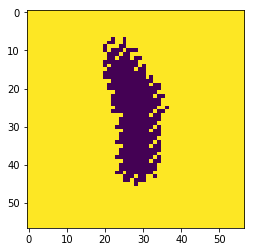

In [20]:
from PIL import Image
input = Variable(torch.from_numpy(img.astype('float32')),
         requires_grad = True).unsqueeze(0).unsqueeze(4)
img = np.load('./../../../visualisations/EncoderDecoder3D_sgd.npy')[2,:,:,:]
plt.imshow(input.data.numpy()[0,:,24,:,0] > 0.5)

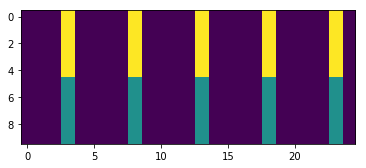

In [38]:
from PIL import Image
img = np.zeros((1,5,5,5,2))
img[0,:,:,3,1] = 0.5
img[0,:,:,3,0] = 1.0

g = PersGridGen(5,5,5)
v = VTN()
theta = np.pi  / 2
input = Variable(torch.from_numpy(np.array([[[np.cos(theta),-np.sin(theta), 0, 0], 
                                             [np.sin(theta),np.cos(theta), 0, 0], [0, 0, 1, 0]]], dtype=np.float32)), requires_grad = True)
out2 = g(input)
input = Variable(torch.from_numpy(img.astype('float32')),
         requires_grad = True)
res2 = v(input, out2)

plt.imshow(np.vstack((
    np.hstack((img[0,0,:,:,0], img[0,1,:,:,0], img[0,2,:,:,0], img[0,3,:,:,0], img[0,4,:,:,0])),
    np.hstack((img[0,0,:,:,1], img[0,1,:,:,1], img[0,2,:,:,1], img[0,3,:,:,1], img[0,4,:,:,1]))
)))

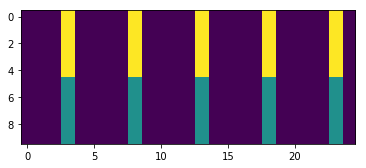

In [39]:
res2 = res2.data.cpu().numpy()
plt.imshow(np.vstack((
    np.hstack((res2[0,0,:,:,0], res2[0,1,:,:,0], res2[0,2,:,:,0], res2[0,3,:,:,0], res2[0,4,:,:,0])),
    np.hstack((res2[0,0,:,:,1], res2[0,1,:,:,1], res2[0,2,:,:,1], res2[0,3,:,:,1], res2[0,4,:,:,1]))
)))

In [24]:
g = AffineGridGen(3,3)
input = Variable(torch.from_numpy(np.array([[[1, 0.5, 0], [0.5, 1, 0]]], dtype=np.float32)), requires_grad = True)
out = g(input)
print(out[:,:,1])

Variable containing:
(0 ,.,.) = 
 -1.1667 -0.8333
 -0.5000 -0.5000
  0.1667 -0.1667
[torch.FloatTensor of size 1x3x2]



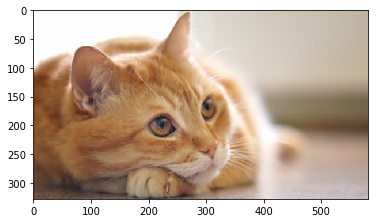

In [25]:
img = Image.open('cat.jpg').convert('RGB')
img = np.array(img)/255.0
plt.imshow(img)

In [26]:
img_batch = np.expand_dims(img, 0)
inputImages = torch.from_numpy(img_batch.astype(np.float32))
inputImages.size()
s = STN()
v = VTN()
g = AffineGridGen(328, 582)
input = Variable(torch.from_numpy(np.array([[[1,0, 0], [0, 1, 0]]], dtype=np.float32)), requires_grad = True)
out = g(input).repeat(20,1,1,1)

input1 = Variable(inputImages).repeat(20,1,1,1)
res = s(input1, out)

input_var2 = Variable(torch.from_numpy(np.load('./sculptures.npy')))
input_var2 = 1 - input_var2[1,:,:,:].unsqueeze(0).unsqueeze(4)
p1 = PersGridGen(57,57,57)
input = Variable(torch.from_numpy(np.array([[[0,1, 0, 0], [1,0, 0, 0], [0, 0, 1, 0]]], dtype=np.float32)), requires_grad = True)
out2 = p1(input)
print(out.size())
res2 = v(input_var2, out2)
print(res.size())

res = res.cpu().data.numpy()

torch.Size([20, 328, 582, 2])
torch.Size([20, 328, 582, 3])


In [27]:
print(input_var2.size())
print(input1.size())

print(out.size())
print(out2.size())
print(res.shape)
print(res2.size())

torch.Size([1, 57, 57, 57, 1])
torch.Size([20, 328, 582, 3])
torch.Size([20, 328, 582, 2])
torch.Size([1, 57, 57, 57, 3])
(20, 328, 582, 3)
torch.Size([1, 57, 57, 57, 1])


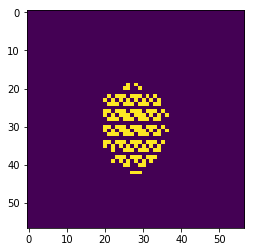

In [28]:
plt.imshow(input_var2.data.numpy()[0,:,24,:,0] > 0.5)

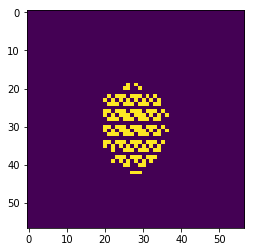

In [29]:
plt.imshow(res2.data.numpy()[0,24,:,:,0] > 0.5)

In [30]:
target = Variable(res.data)

RuntimeError: Variable data has to be a tensor, but got memoryview

In [ ]:
crt = nn.L1Loss()

In [ ]:
loss = crt(res, target)

In [ ]:
loss.backward()

In [ ]:
print(input.grad)

In [ ]:
input = Variable(torch.from_numpy(np.array([[[1, 0.5, 0], [0.5, 1, 0]]], dtype=np.float32)), requires_grad = True)
out = g(input).repeat(20,1,1,1)
out.backward(out.data)

In [ ]:
print(input.grad)

In [ ]:
plt.imshow(res[1])

In [ ]:
target = Variable(res.data)[0:1,:,:,:]

In [ ]:
print(input1.size(), target.size())

In [ ]:
crt = nn.L1Loss().cuda()
crt2 = nn.L1Loss().cuda()

In [ ]:
crt.forward(input1[0:1], target)

In [ ]:
class Transformer(nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        self.s = STN()
        self.g = AffineGridGen(328, 582, lr = 0.01)
    def forward(self,input1, input2):
        out = self.g(input2)
        out2 = self.s(input1, out)
        return out2

In [ ]:
t = Transformer()

In [ ]:
x = np.arange(0.1, 2, 0.01)
y = []
g_ = []
input1 = Variable(inputImages)

for v in x:
    input2 = Variable(torch.from_numpy(np.array([[[1, 0.5, 0], [0.48, v, 0]]], dtype=np.float32)) , requires_grad = True)
    out = t(input1, input2)
    err = crt(out, target)
    y.append(err.data[0])
    err.backward()
    
    #print input2.grad.size()
    g_.append(input2.grad.data[0,1,1])


In [ ]:
print(input1.size())
print(input2.size())

In [ ]:
plt.figure()
plt.plot(x,y)
plt.figure()
plt.plot(x,g_)